In [1]:
# P7 Final Custom BI Project
# Korey Sansone

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('smart_sales.db')

# Check table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
tables

,name


In [11]:
# Load the prepared sales data
import pandas as pd

sales_df = pd.read_csv('data/prepared/sales_data_prepared.csv')

# Show the first few rows to verify
sales_df.head()

,transactionid,saledate,customerid,productid,storeid,campaignid,saleamount,discountpercent,paymenttype
0,550,1/6/2024,1008,102,404,0,39.10,5.0,Credit
1,551,1/6/2024,1009,105,403,0,19.78,10.0,Cash
2,552,1/16/2024,1004,107,404,0,335.10,5.0,Credit
3,553,1/16/2024,1006,102,406,0,195.50,5.0,Credit
4,554,1/25/2024,1005,102,405,0,117.30,5.0,Credit


In [13]:
# Analyze: Total Sales Amount by Product
product_sales = sales_df.groupby('productid')['saleamount'].sum().reset_index().sort_values(by='saleamount', ascending=False)
product_sales.head()

,productid,saleamount
0,101,88829.44
6,107,7037.10
5,106,4182.06
3,104,4008.30
1,102,2111.40


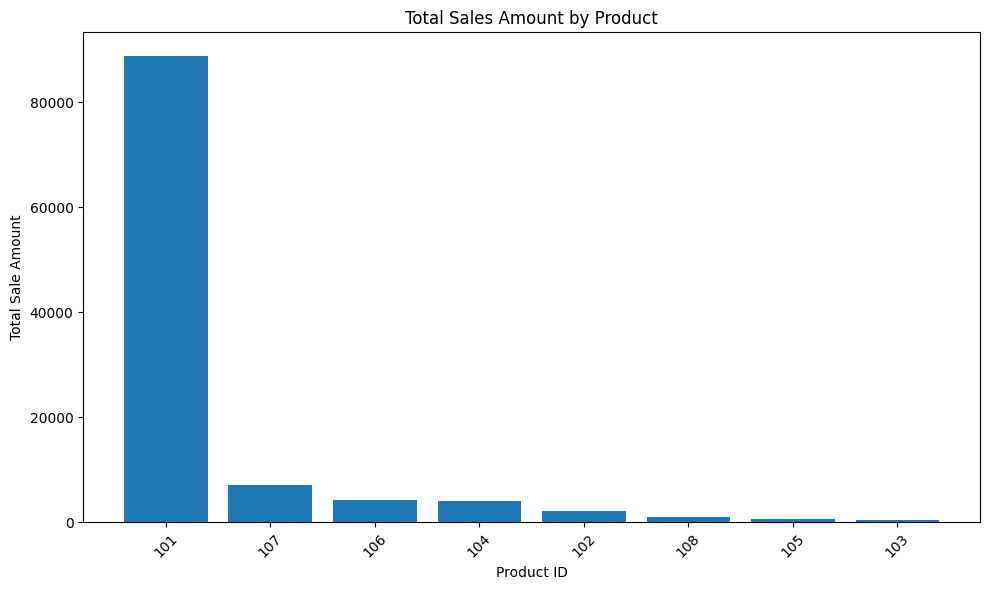

In [14]:
# Visualize: Total Sales Amount by Product
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(product_sales['productid'].astype(str), product_sales['saleamount'])
plt.xlabel('Product ID')
plt.ylabel('Total Sale Amount')
plt.title('Total Sales Amount by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Analyze: Average Discount Percent by Payment Type
discount_payment = sales_df.groupby('paymenttype')['discountpercent'].mean().reset_index().sort_values(by='discountpercent', ascending=False)
discount_payment.head()

,paymenttype,discountpercent
7,PayPal,1.693340e+06
1,Casdh,2.000000e+01
3,Cashcash,1.500000e+01
5,CreditCard,1.166667e+01
2,Cash,1.004800e+01


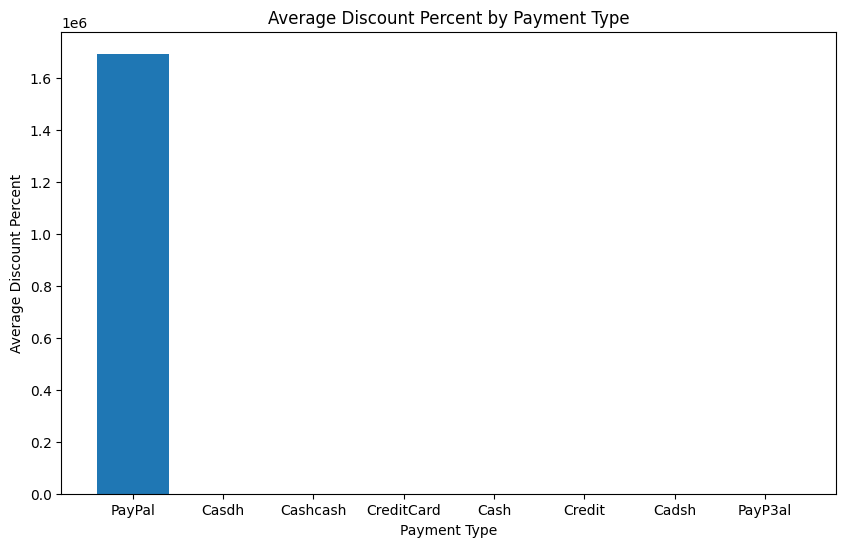

In [16]:
# Visualize: Average Discount Percent by Payment Type
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(discount_payment['paymenttype'], discount_payment['discountpercent'])
plt.xlabel('Payment Type')
plt.ylabel('Average Discount Percent')
plt.title('Average Discount Percent by Payment Type')
plt.show()

In [17]:
# Analyze: Average Sale Amount by Store
store_sales = sales_df.groupby('storeid')['saleamount'].mean().reset_index().sort_values(by='saleamount', ascending=False)
store_sales.head()

,storeid,saleamount
0,401,1805.747778
1,402,1512.849000
3,404,1335.898000
5,406,976.318333
4,405,853.651579


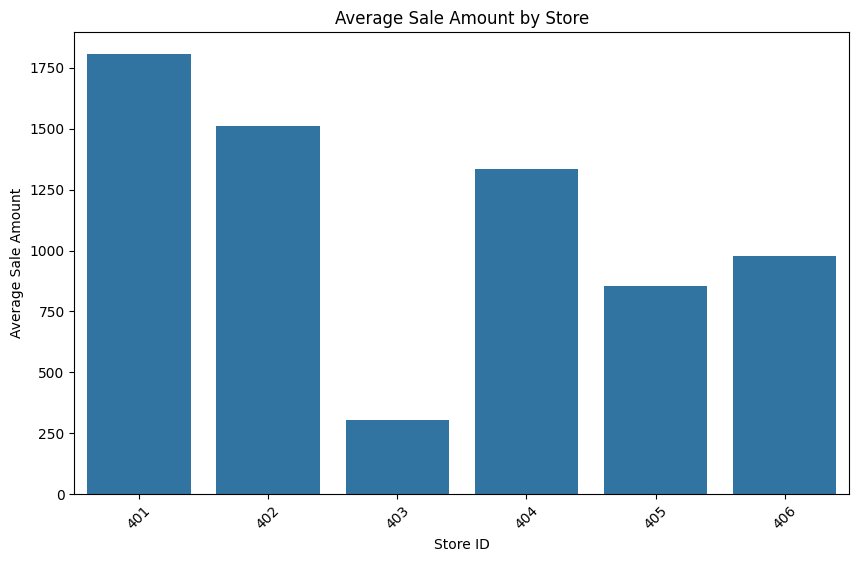

In [18]:
# Visualize: Average Sale Amount by Store
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=store_sales, x='storeid', y='saleamount')
plt.title('Average Sale Amount by Store')
plt.xlabel('Store ID')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Analyze: Total Sales Amount by Campaign
campaign_sales = sales_df.groupby('campaignid')['saleamount'].sum().reset_index().sort_values(by='saleamount', ascending=False)
campaign_sales.head()

,campaignid,saleamount
0,0,80046.94
1,1,10453.82
3,3,9224.72
2,2,8562.78


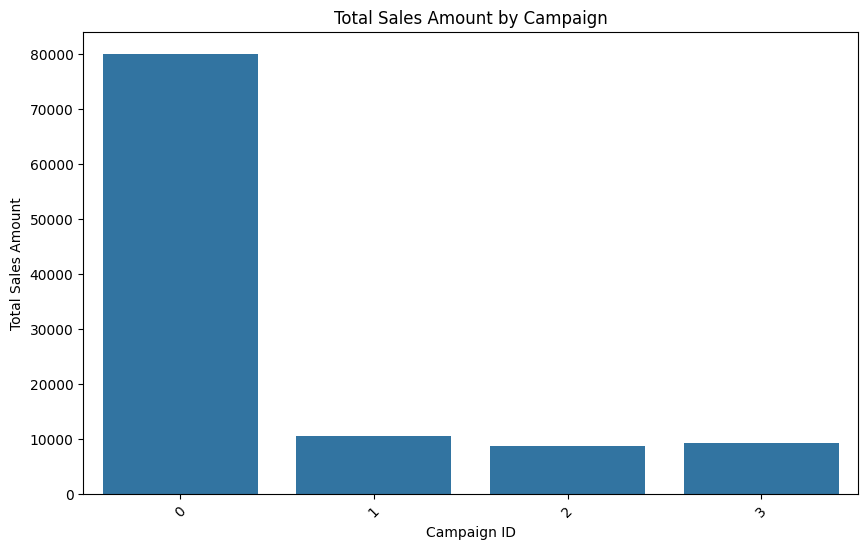

In [20]:
# Visualize: Total Sales Amount by Campaign
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=campaign_sales, x='campaignid', y='saleamount')
plt.title('Total Sales Amount by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Analyze: Total Sales Amount by Payment Type
payment_sales = sales_df.groupby('paymenttype')['saleamount'].sum().reset_index().sort_values(by='saleamount', ascending=False)
payment_sales.head()

,paymenttype,saleamount
2,Cash,33876.20
7,PayPal,30129.96
5,CreditCard,27320.32
6,PayP3al,7931.20
4,Credit,7765.26


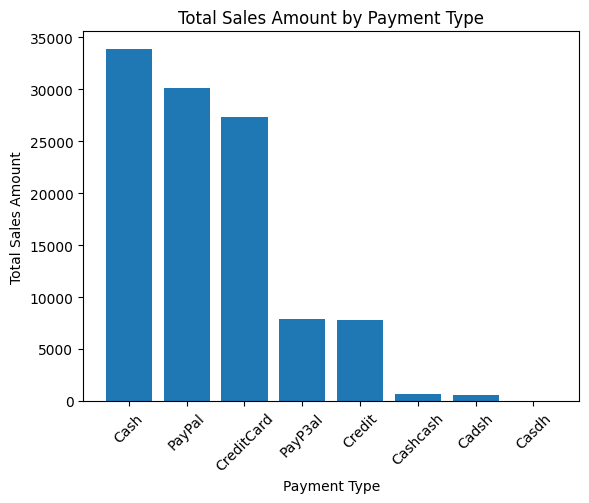

In [22]:
# Visualize: Total Sales Amount by Payment Type
import matplotlib.pyplot as plt

plt.bar(payment_sales['paymenttype'], payment_sales['saleamount'])
plt.title('Total Sales Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [25]:
import os
os.makedirs('OLAP', exist_ok=True)

# Save all key plots to the 'OLAP' folder
product_sales.plot(kind='bar', x='productid', y='saleamount', title='Total Sales Amount by Product', legend=False)
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.savefig('OLAP/p6c_total_sales_by_product.png')
plt.clf()

discount_payment.plot(kind='bar', x='paymenttype', y='discountpercent', title='Average Discount Percent by Payment Type', legend=False)
plt.ylabel('Average Discount Percent')
plt.tight_layout()
plt.savefig('OLAP/p6c_avg_discount_by_payment.png')
plt.clf()

store_sales.plot(kind='bar', x='storeid', y='saleamount', title='Average Sale Amount by Store', legend=False)
plt.ylabel('Average Sale Amount')
plt.tight_layout()
plt.savefig('OLAP/p6c_avg_sale_by_store.png')
plt.clf()

campaign_sales.plot(kind='bar', x='campaignid', y='saleamount', title='Total Sales Amount by Campaign', legend=False)
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.savefig('OLAP/p6c_total_sales_by_campaign.png')
plt.clf()

payment_sales.plot(kind='bar', x='paymenttype', y='saleamount', title='Total Sales Amount by Payment Type', legend=False)
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.savefig('OLAP/p6c_total_sales_by_payment.png')
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>